# Differential Trends
This document shows how SparseSC can be used in places where simple difference-in-differences can't.

In [1]:
#If running from the repo and you would like to use the local pkg version uncomment the following lines, otherwise comment
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

In [2]:
#Setup
import numpy as np
import random
import matplotlib.pyplot as plt
import SparseSC as SC
#make sure the results are the same each time we run
random.seed(12345) 
np.random.seed(12345)

Now make some data

In [3]:
N1,N0_sim,N0_not = 1,50,50
N0 = N0_sim + N0_not
N=N1+N0
treated_units = [0]
control_units = list(set(range(N)) - set(treated_units))
N1_sim = 50 #which ones look like the treatment
T0,T1 = 5, 5
T=T0+T1
proto_sim = np.array(range(0,T,1),ndmin=2)
proto_not = np.array(range(0,2*T,2),ndmin=2)
te = np.hstack((np.zeros((1,T0)), np.full((1,T0), 2)))
Y1 = proto_sim + te
Y0_sim = np.matmul(np.ones((N0_sim,1)), proto_sim)
Y0_not = np.matmul(np.ones((N0_not,1)), proto_not)
Y = np.vstack((Y1,Y0_sim,Y0_not))

Motivate

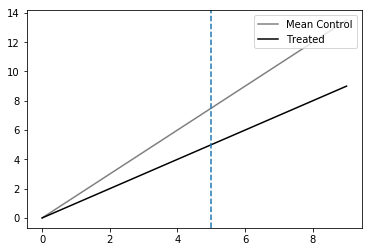

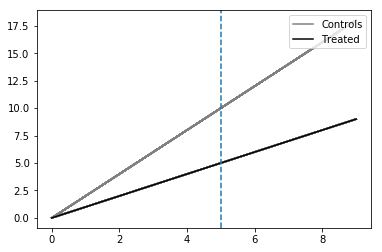

In [4]:
plt.plot(np.mean(Y[control_units,:], axis=0), color='gray', label='Mean Control')
plt.plot(Y[1,:], color='black', label='Treated')
plt.axvline(x=5, linestyle='--')
plt.legend(loc=1)
plt.show()
plt.plot(np.transpose(Y[control_units,:]), color='gray')
plt.plot(Y[2,:], color='gray', label='Controls')
plt.plot(Y[1,:], color='black', label='Treated')
plt.axvline(x=5, linestyle='--')
plt.legend(loc=1)
plt.show()

Now analyze

In [5]:
ret = SC.estimate_effects(Y[:,:T0], Y[:,T0:], treated_units)
Y_sc = ret[0].predict(Y[control_units, :])

Now display

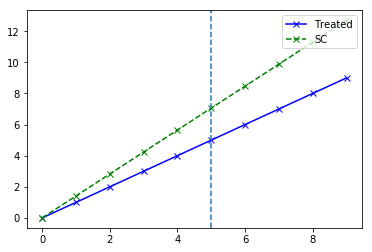

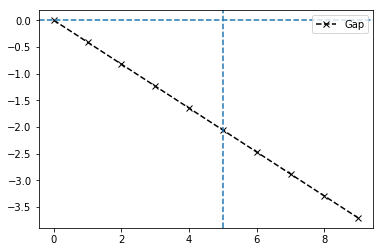

In [6]:
plt.plot(Y[1,:], 'bx-', label='Treated')
plt.plot(Y_sc[1,:], 'gx--', label='SC')
plt.axvline(x=5, linestyle='--')
plt.legend(loc=1)
plt.show()
diffs = Y - Y_sc
est_te = diffs[1,:]
plt.plot(est_te, 'kx--', label='Gap')
plt.axvline(x=5, linestyle='--')
plt.axhline(y=0, linestyle='--')
plt.legend(loc=1)
plt.show()

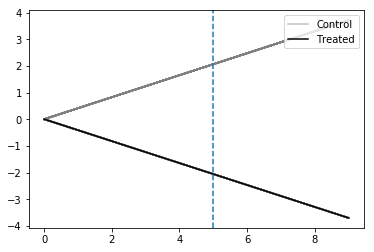

In [7]:
plt.plot(np.transpose(diffs[control_units,:]), alpha=.5, color='gray')
plt.plot(est_te, alpha=.5, color='gray', label='Control') #fake one for legend
plt.plot(est_te, color='black', label='Treated')
plt.axvline(x=5, linestyle='--')
plt.legend(loc=1)
plt.show()